## Parse and Plot

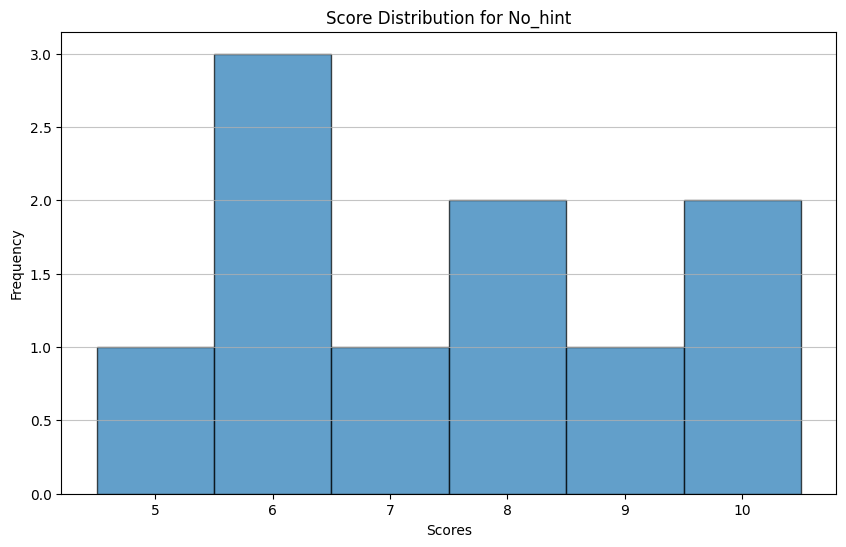

No_hint - Mean: 7.50, Standard Deviation: 1.69


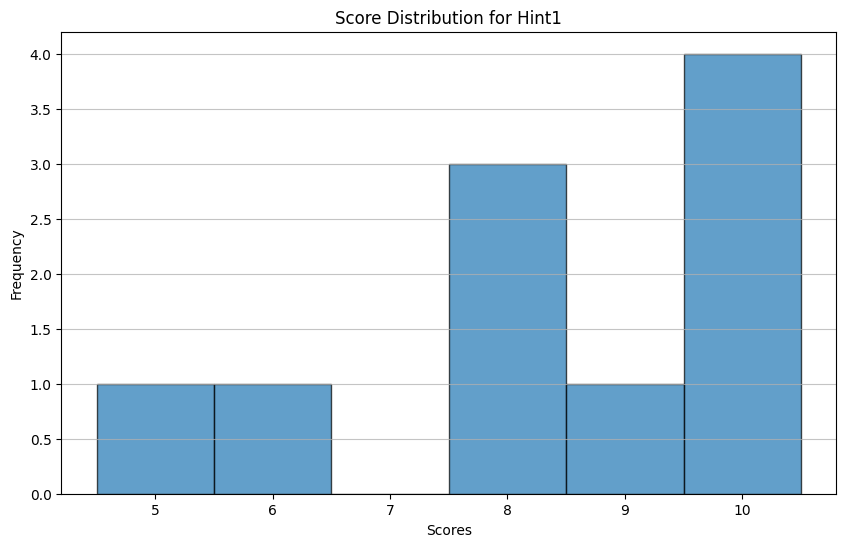

Hint1 - Mean: 8.40, Standard Deviation: 1.69


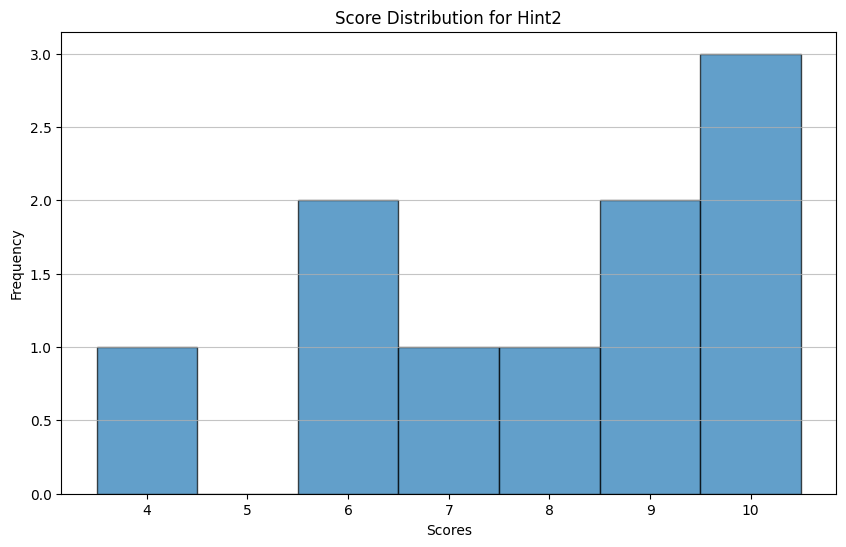

Hint2 - Mean: 7.90, Standard Deviation: 1.97


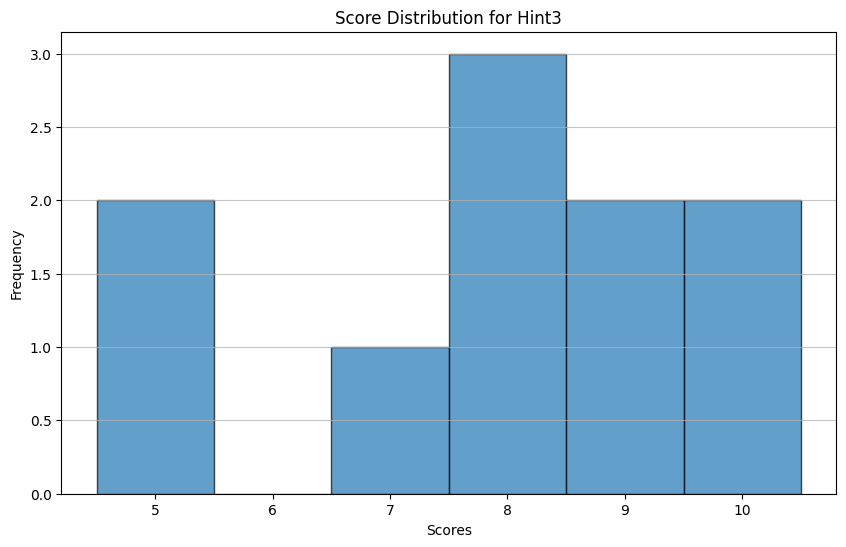

Hint3 - Mean: 7.90, Standard Deviation: 1.70


In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_stats(data, key):
    # Extract the grades for the given key and convert them to float
    grades = [float(item[key]['grade']) for item in data if key in item]
    mean = np.mean(grades)
    std_dev = np.std(grades)
    return grades, mean, std_dev

def plot_distribution(data, category, grades):
    plt.figure(figsize=(10, 6))
    # Convert grades to integers for histogram bin edges if necessary
    bin_edges = np.arange(int(min(grades)), int(max(grades)) + 2) - 0.5
    plt.hist(grades, bins=bin_edges, alpha=0.7, edgecolor='black')
    plt.title(f'Score Distribution for {category}')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(np.arange(int(min(grades)), int(max(grades)) + 1))
    plt.show()

def parse_and_plot(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        quiz_data = json.load(file)
        
    categories = ['No_hint', 'Hint1', 'Hint2', 'Hint3']
    stats = {}
    
    for category in categories:
        grades, mean, std_dev = calculate_stats(quiz_data, category)
        stats[category] = {'mean': mean, 'std_dev': std_dev}
        plot_distribution(quiz_data, category, grades)
        
        print(f"{category} - Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

    return stats

# Path to the JSON file with graded hints
graded_json_file_path = 'graded_GPT4.json'

# Parse the JSON file and plot distributions
category_stats = parse_and_plot(graded_json_file_path)
